## Савченко Григорий Александрович, ИУ5-62Б, Вариант 19

### Рубежный контроль №2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('investments_VC.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(54294, 39)

In [4]:
# типы колонок
data.dtypes

permalink                object
name                     object
homepage_url             object
category_list            object
 market                  object
 funding_total_usd       object
status                   object
country_code             object
state_code               object
region                   object
city                     object
funding_rounds          float64
founded_at               object
founded_month            object
founded_quarter          object
founded_year            float64
first_funding_at         object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    float64
round_A 

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

In [6]:
# текстовые данные преобразуем в числовые
columns_string = data.select_dtypes(include='object').columns.tolist()

In [7]:
for column_string in columns_string:
    data[column_string] = pd.factorize(data[column_string])[0]

In [8]:
# приведем все числа к значениям от 0 до 1
scaler = MinMaxScaler()

In [9]:
scaler.fit_transform(data)

array([[2.02281738e-05, 2.02634245e-05, 2.18102508e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.04563476e-05, 4.05268490e-05, 4.36205016e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.06845214e-05, 6.07902736e-05, 6.54307525e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                   nan,            nan,            nan],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                   nan,            nan,            nan],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                   nan,            nan,            nan]])

In [10]:
# занулим пропущенные данные (nan)
data.fillna(0, inplace=True)

<AxesSubplot:>

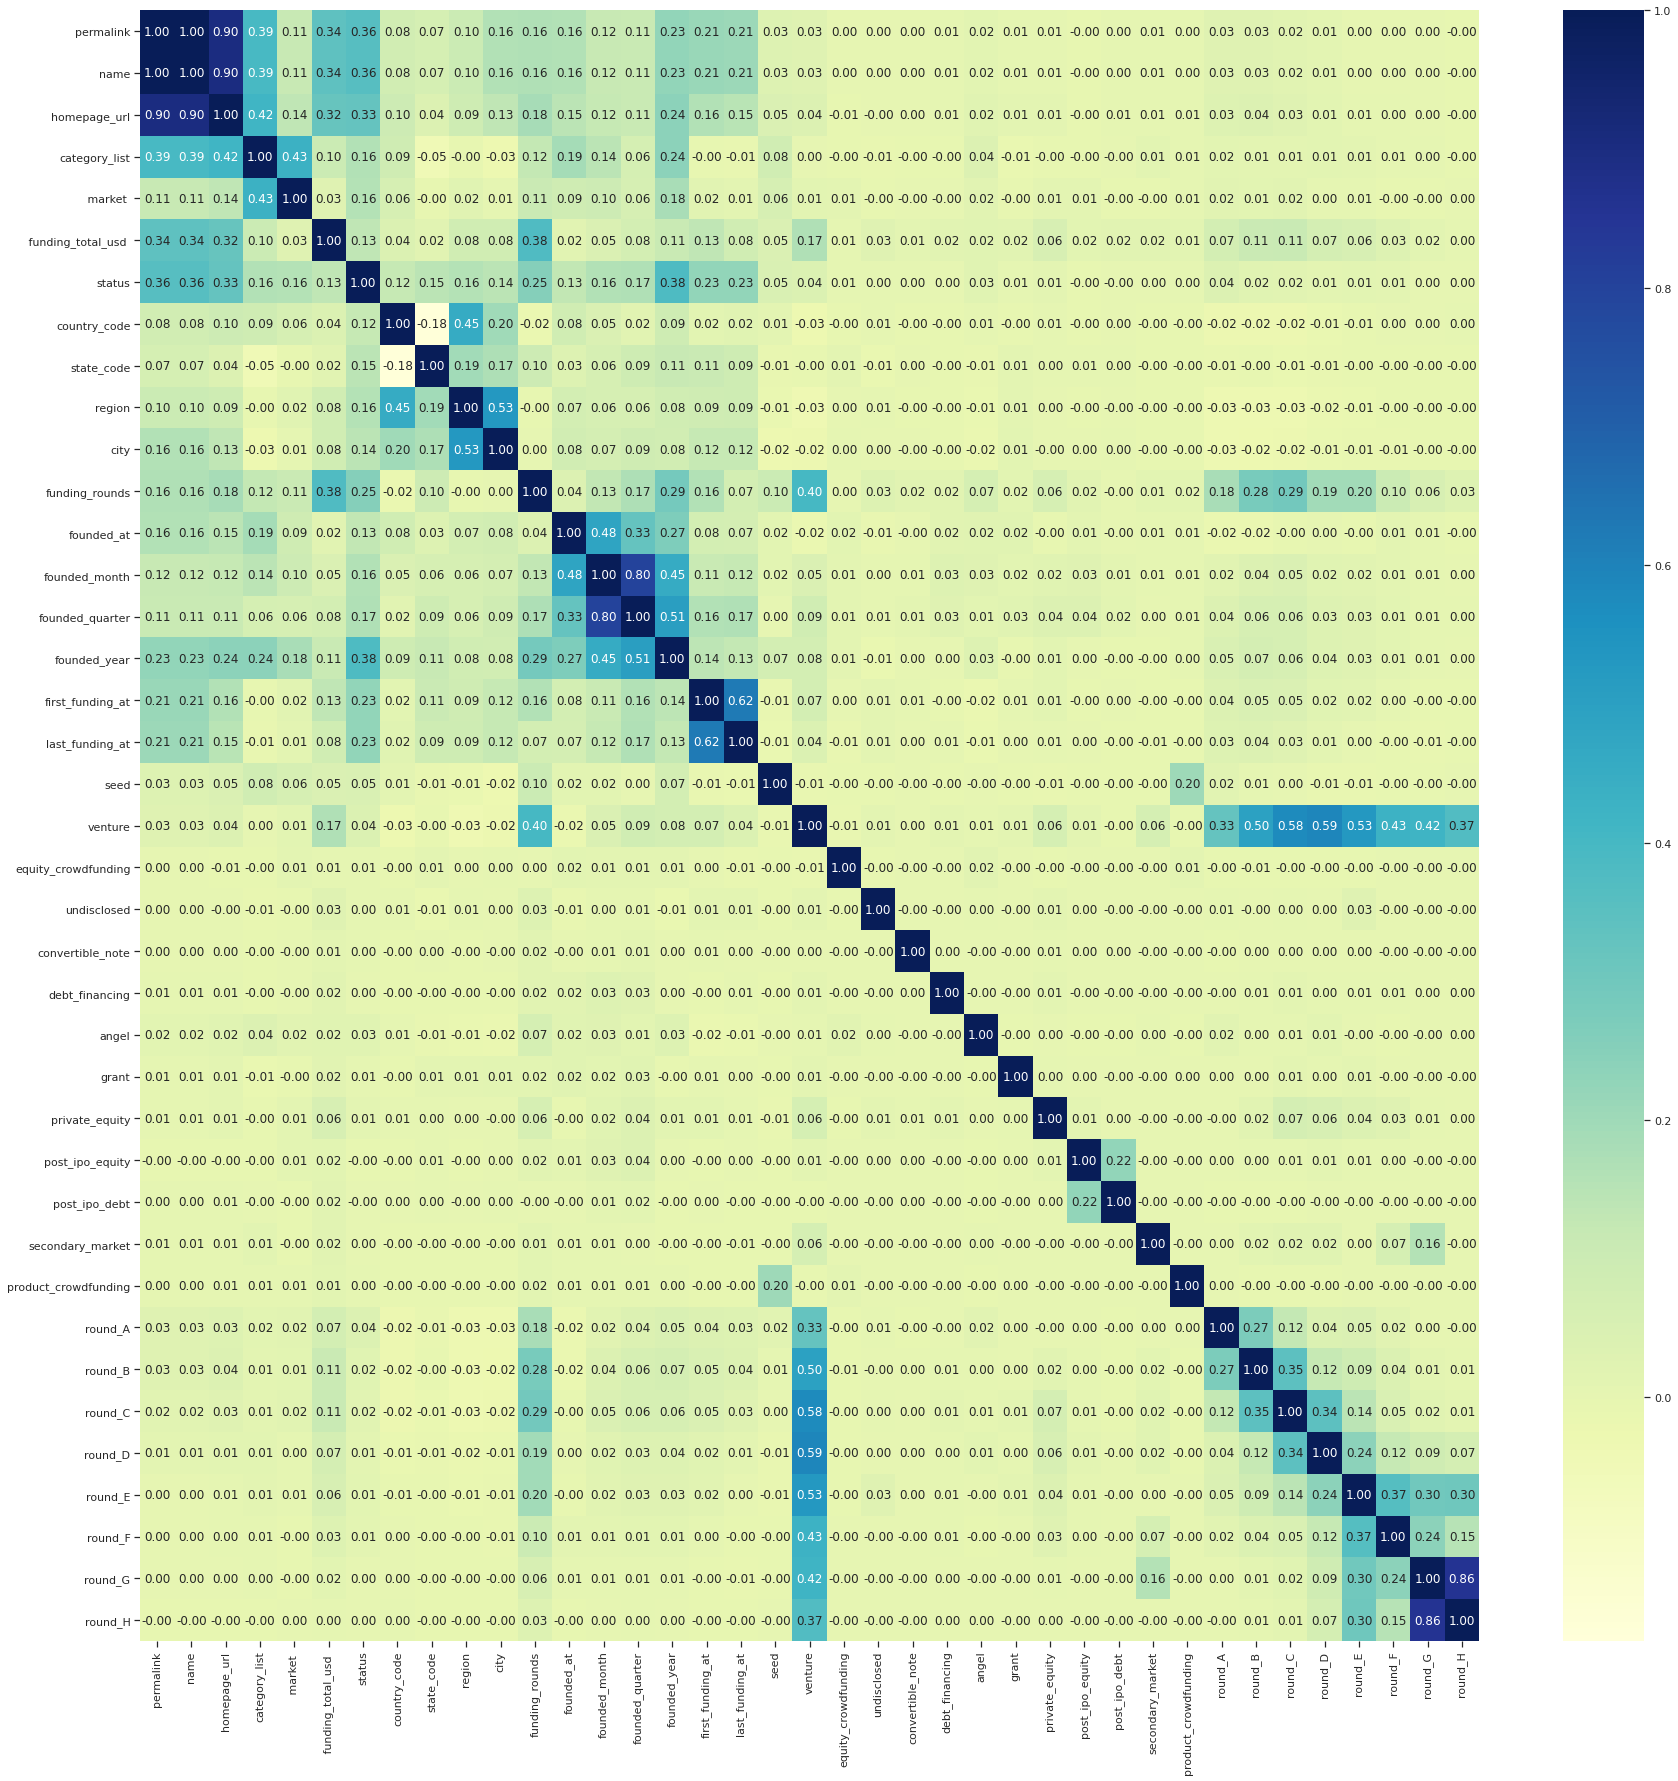

In [11]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap="YlGnBu")

In [12]:
# data = data.drop(['permalink', 'name', 'homepage_url', 'category_list', ' market ', ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region', 'city', 'founded_at', 'founded_month', 'founded_quarter', 'first_funding_at', 'last_funding_at'], 1)
data.shape

(54294, 39)

In [13]:
data.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,1,1,1,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,2,2,2,2,1,1,-1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,3,3,3,3,1,2,-1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,-1,4,4,4,1,0,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Метод опорных векторов: визуализация

In [52]:
data_x = data['round_C'].values
data_y = data['venture'].values

<AxesSubplot:>

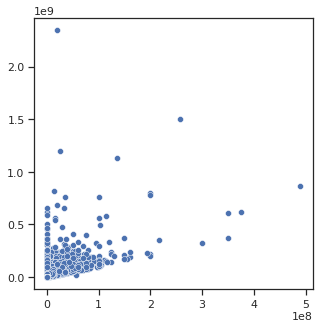

In [53]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x=data_x, y=data_y)

In [54]:
def plot_regr(clf):
    title = clf.__repr__
    clf.fit(data_x.reshape(-1, 1), data_y)
    data_y_pred = clf.predict(data_x.reshape(-1, 1))
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    ax.plot(data_x, data_y, 'b.')
    ax.plot(data_x, data_y_pred, 'ro')
    plt.show()

/root/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


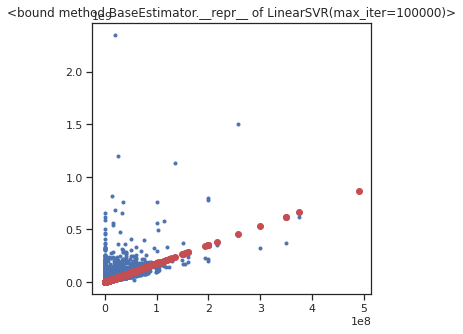

In [55]:
plot_regr(LinearSVR(C=1.0, max_iter=100000))

In [ ]:
plot_regr(SVR(kernel='linear', C=1.0))

In [ ]:
plot_regr(SVR(kernel='rbf', gamma=0.8, C=1.0))

In [ ]:
plot_regr(NuSVR(kernel='rbf', gamma=0.4, nu=0.9, C=1.0))

### Масштабирование данных

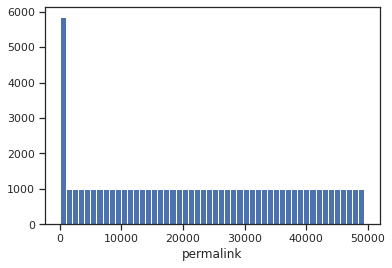

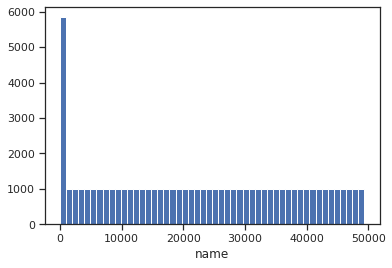

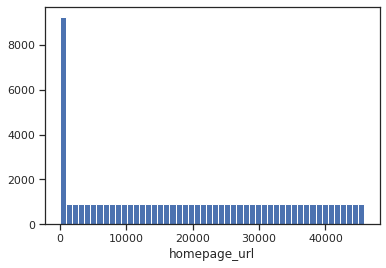

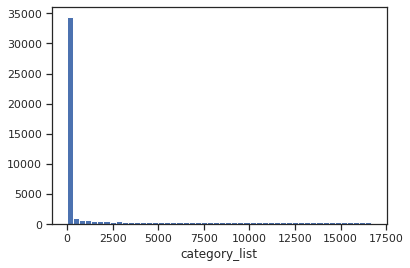

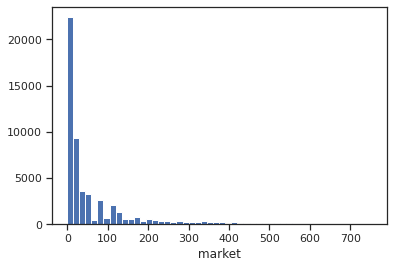

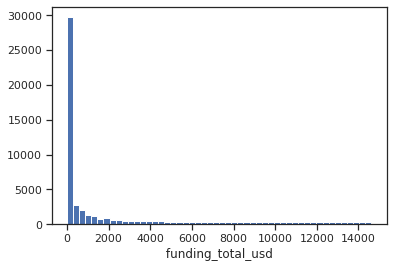

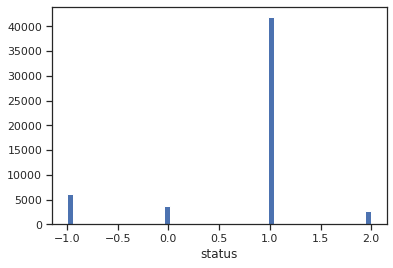

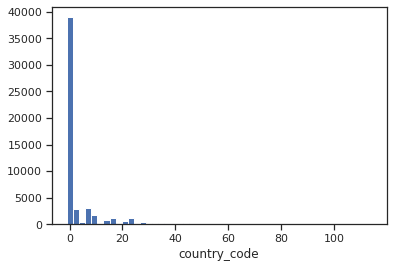

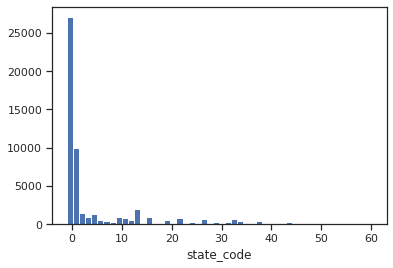

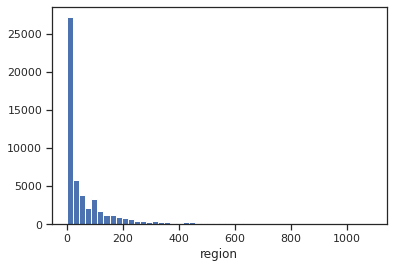

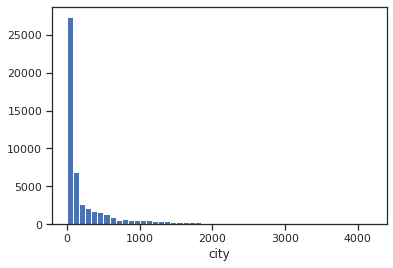

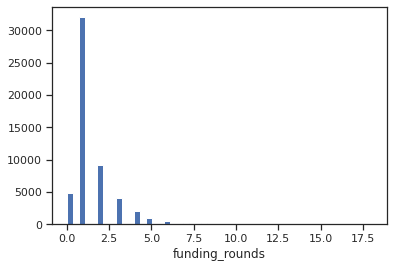

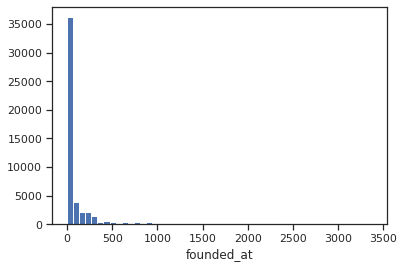

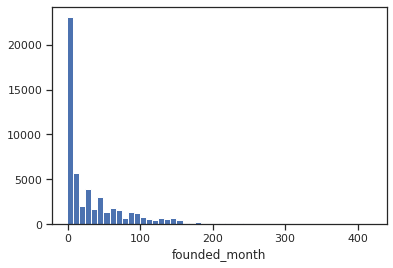

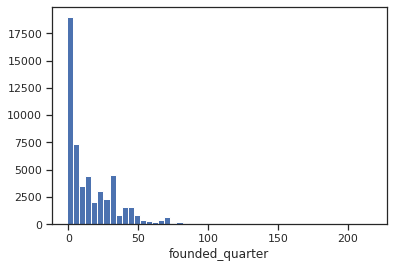

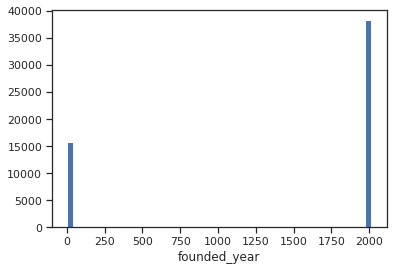

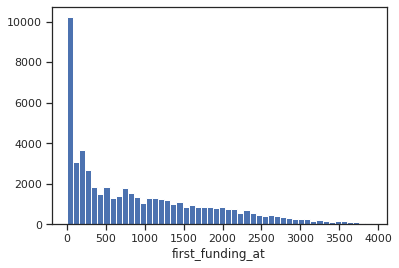

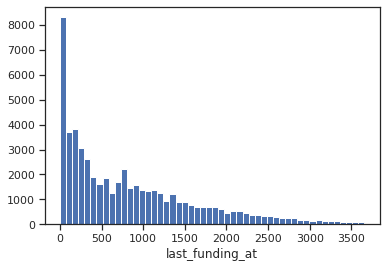

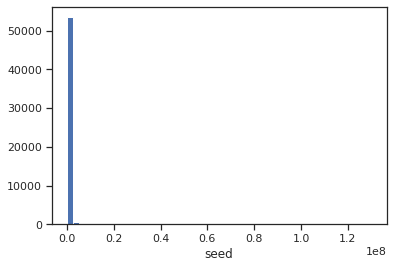

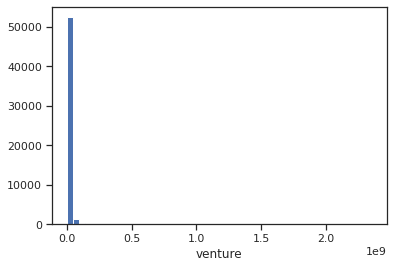

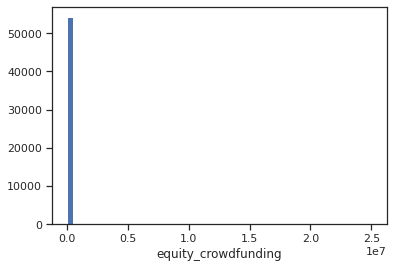

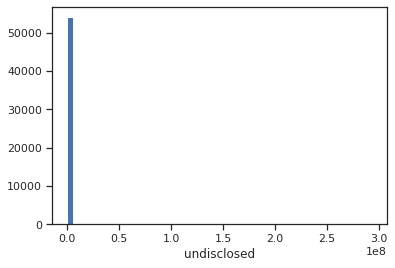

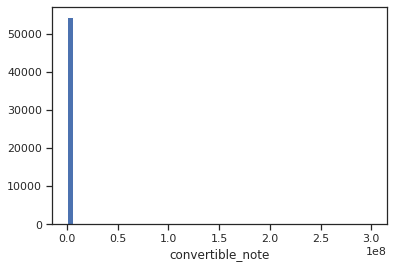

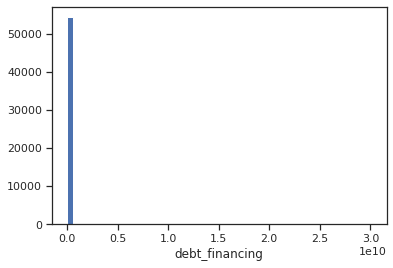

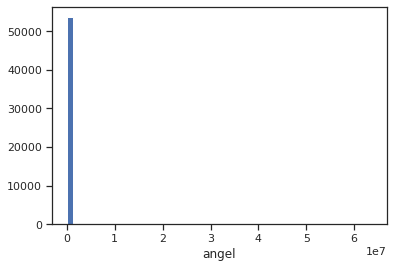

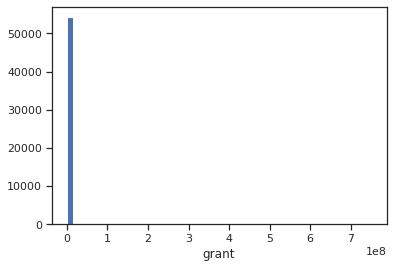

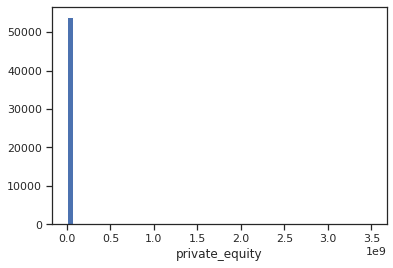

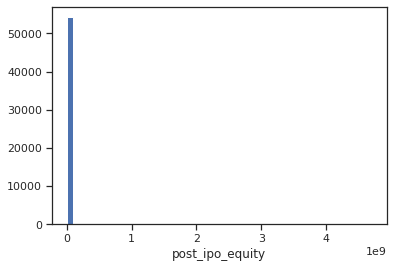

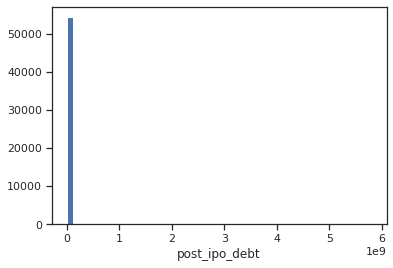

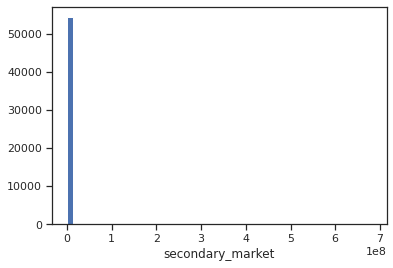

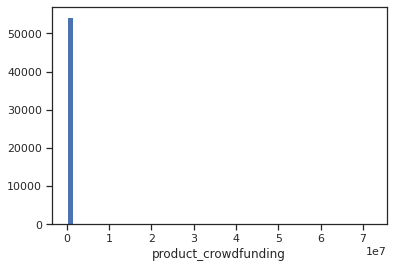

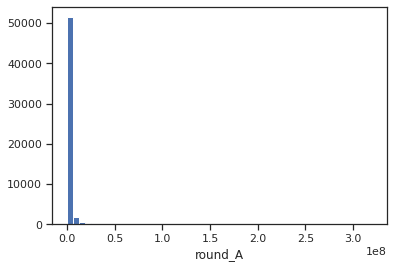

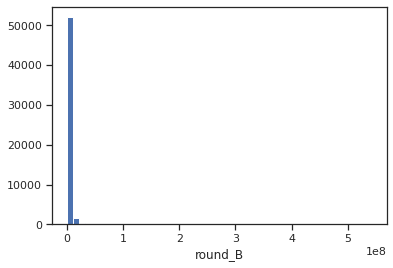

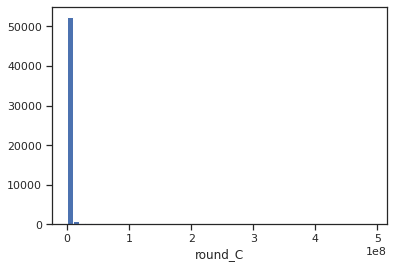

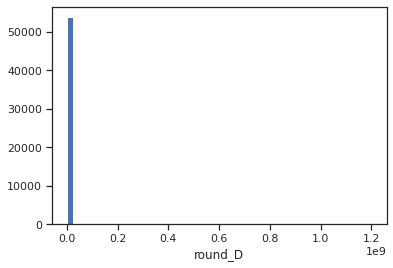

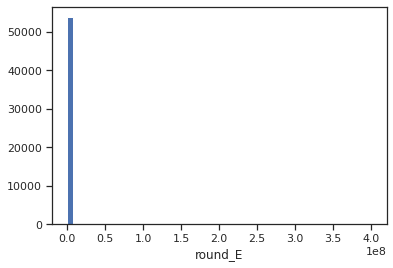

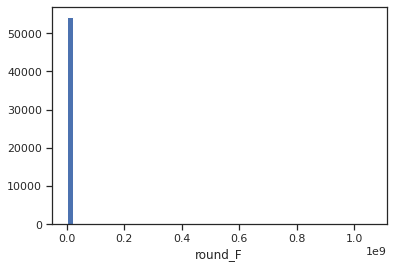

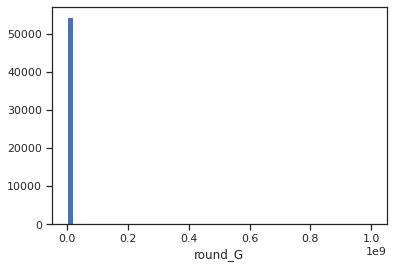

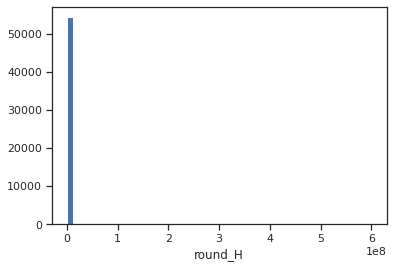

In [14]:
# Гистограмма по признакам
num_col = data.columns.tolist()
for col in num_col:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

### Выбор класса для задачи регрессии метода опорных векторов

In [15]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    data[num_col], data['first_funding_at'], test_size=0.5, random_state=1)

data_X_train.shape, data_X_test.shape

((27147, 39), (27147, 39))

In [16]:
svr_1 = SVR()
svr_1.fit(data_X_train, data_y_train)

SVR()

In [17]:
data_y_pred = svr_1.predict(data_X_test)

In [18]:
mean_absolute_error(data_y_test, data_y_pred), mean_squared_error(data_y_test, data_y_pred)

(727.7916571538794, 897568.1810097131)

In [19]:
nusvr_1 = NuSVR(gamma=0.4, nu=0.9, C=1.0)
nusvr_1.fit(data_X_train, data_y_train)

NuSVR(gamma=0.4, nu=0.9)

In [20]:
data_y_pred = nusvr_1.predict(data_X_test)

In [21]:
mean_absolute_error(data_y_test, data_y_pred), mean_squared_error(data_y_test, data_y_pred)

(673.9775777051882, 828358.56736201)

NuSVR(gamma=0.4, nu=0.9) имеет меньшие средние абсолютную и квадратичную ошибки по сравнению с SVR(). Поэтому для построения модели будем использовать NuSVR(gamma=0.4, nu=0.9).

### Построение моделей регрессии и оценка качеств моделей

In [22]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0, a, str(round(b,4)), color='black')
    plt.show()

In [23]:
# Качество отдельных моделей
def val_mae(model, array_mae, array_mse, array_r2):
    model.fit(data_X_train, data_y_train)
    data_y_pred = model.predict(data_X_test)
    result = mean_absolute_error(data_y_test, data_y_pred)
    result1 = mean_squared_error(data_y_test, data_y_pred)
    result2 = r2_score(data_y_test, data_y_pred)
    print(model)
    print('mean_absolute_error={}'.format(result))
    print('mean_squared_error={}'.format(result1))
    print('r2_score={}'.format(result2))
    array_mae += [result]
    array_mse += [result1]
    array_r2 += [result2]

In [24]:
array_labels = ['NuSVR','RandomForestRegressor']

In [25]:
array_mae =[]
array_mse =[]
array_r2 =[]
# Точность на отдельных моделях
for model in [
    NuSVR(kernel='rbf', gamma=0.4, nu=0.9, C=1.0),
    RandomForestRegressor()
]:
    val_mae(model, array_mae, array_mse, array_r2)
    print('==========================')
    print()

NuSVR(gamma=0.4, nu=0.9)
mean_absolute_error=673.9775777051882
mean_squared_error=828358.56736201
r2_score=0.021739542947291413

RandomForestRegressor()
mean_absolute_error=0.09527793126312128
mean_squared_error=0.23062522930710674
r2_score=0.999999727640238



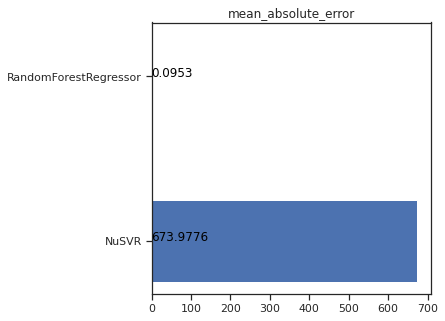

In [26]:
# Визуализация результатов
vis_models_quality(array_mae, array_labels, 'mean_absolute_error')

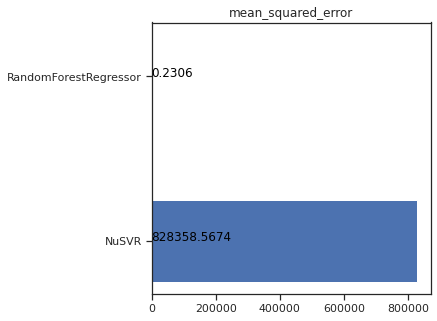

In [27]:
# Визуализация результатов
vis_models_quality(array_mse, array_labels, 'mean_squared_error')

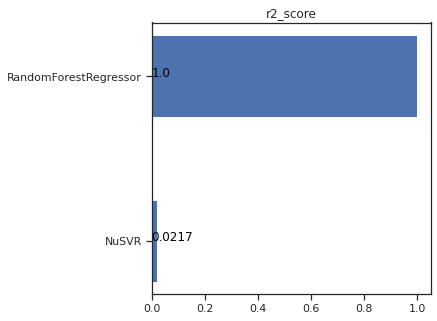

In [28]:
# Визуализация результатов
vis_models_quality(array_r2, array_labels, 'r2_score')